# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [2]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "../data/train.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


In [3]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #sharpen
    gaus = cv2.GaussianBlur(gray, (9,9), 10.0)
    sharp_image = cv2.addWeighted(gray, 1.5, gaus, -0.5, 0, gray)
    
    return sharp_image


(32, 32, 3)
(3072,)
3072
(1024,)
1024


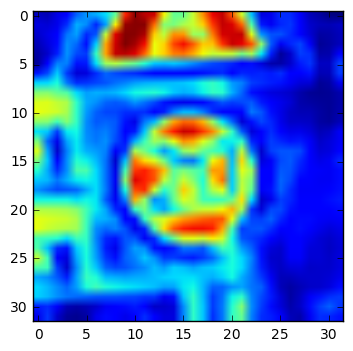

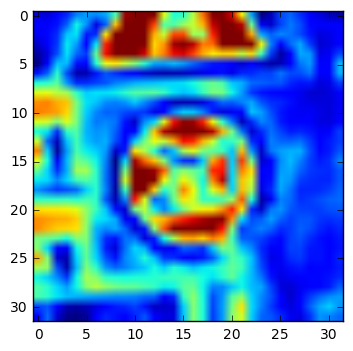

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

"""
#print(y_train)
for cls in range(n_classes):
    cls_idx = np.where(y_train==cls)    
    #print(cls_idx[0][0])
    plt.figure()
    plt.imshow(X_train[cls_idx[0][0]])
"""
"""
plt.imshow(X_train[0])
plt.figure()
plt.imshow(X_test[0])
"""

print(X_train[0].shape)

flt = X_train[0].flatten()
print(flt.shape)
print(len(flt))


gray = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)

sharp = process_image(X_train[0])

plt.imshow(gray)
plt.figure()
plt.imshow(sharp)

flt = sharp.flatten()
print(flt.shape)
print(len(flt))


In [6]:
import numpy as np

X_train_processed = np.ndarray((X_train.shape[0], 32 * 32))
idx=0
for image in X_train:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gaus = cv2.GaussianBlur(gray, (9,9), 10.0)
    X_train_processed[idx]= (cv2.addWeighted(gray, 1.5, gaus, -0.5, 0, gray)).flatten()
    idx=idx+1

X_test_processed = np.ndarray((X_test.shape[0], 32 * 32))
idx=0
for image in X_test:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gaus = cv2.GaussianBlur(gray, (9,9), 10.0)
    X_test_processed[idx]= (cv2.addWeighted(gray, 1.5, gaus, -0.5, 0, gray)).flatten()
    idx=idx+1    

In [7]:
import numpy as np

X_train_processed = np.ndarray((X_train.shape[0], 32 * 32 * 3))
idx=0
for image in X_train:
    X_train_processed[idx]= image.flatten()
    idx=idx+1

X_test_processed = np.ndarray((X_test.shape[0], 32 * 32 * 3))
idx=0
for image in X_test:
    X_test_processed[idx]= image.flatten()
    idx=idx+1    

In [8]:
"""
idx = 100
plt.imshow(X_test[idx])
plt.figure()
plt.imshow(X_test_processed[idx])
"""

print(X_train_processed.shape)
print(X_test_processed.shape)

(39209, 3072)
(12630, 3072)


In [9]:
import tensorflow as tf

# tf Graph input
x = tf.placeholder("float", [None, 32 * 32])
y = tf.placeholder("float", [None, n_classes])
 
# Hidden layer 1 with RELU activation
w1 = tf.Variable(tf.random_normal([32 * 32, 256], mean=0, stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], mean=0, stddev=0.01))
layer_1 = tf.add(tf.matmul(x, w1), b1)
layer_1 = tf.nn.relu(layer_1)

# Hidden layer 2 with RELU activation
w2 = tf.Variable(tf.random_normal([256, 256], mean=0, stddev=0.01))
b2 = tf.Variable(tf.random_normal([256], mean=0, stddev=0.01))
layer_2 = tf.add(tf.matmul(layer_1, w2), b2)
layer_2 = tf.nn.relu(layer_2)

# Output layer with linear activation
wo = tf.Variable(tf.random_normal([256, n_classes]))
bo = tf.Variable(tf.random_normal([n_classes]))
logits = tf.add(tf.matmul(layer_2, wo), bo)

prediction = tf.nn.softmax(logits)
predict = tf.argmax(logits, 1) 

learning_rate =  0.001


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [10]:
import tensorflow as tf

# tf Graph input
x = tf.placeholder("float", [None, 32 * 32 * 3])
y = tf.placeholder("float", [None, n_classes])
 
# Hidden layer 1 with RELU activation
w1 = tf.Variable(tf.random_normal([32 * 32 * 3, 1024], mean=0, stddev=0.01))
b1 = tf.Variable(tf.random_normal([1024], mean=0, stddev=0.01))
layer_1 = tf.add(tf.matmul(x, w1), b1)
print(layer_1)
layer_1 = tf.nn.relu(layer_1)

# Hidden layer 2 with RELU activation
w2 = tf.Variable(tf.random_normal([1024, 1024], mean=0, stddev=0.01))
b2 = tf.Variable(tf.random_normal([1024], mean=0, stddev=0.01))
layer_2 = tf.add(tf.matmul(layer_1, w2), b2)
layer_2 = tf.nn.relu(layer_2)

# Output layer with linear activation
wo = tf.Variable(tf.random_normal([1024, n_classes]))
bo = tf.Variable(tf.random_normal([n_classes]))
logits = tf.add(tf.matmul(layer_2, wo), bo)

prediction = tf.nn.softmax(logits)
predict = tf.argmax(logits, 1) 

learning_rate =  0.001


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Tensor("Add_3:0", shape=(?, 1024), dtype=float32)


In [11]:
training_epochs = 100
batch_size = 1000
num_examples = X_train_processed.shape[0]
total_batch = int(num_examples / batch_size)
print(num_examples)


from sklearn.preprocessing import LabelBinarizer

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
print(y_train.shape)
y_test = encoder.transform(y_test)
print(y_test.shape)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
is_labels_encod = True

print('Labels One-Hot Encoded')


39209
(39209, 43)
(12630, 43)
Labels One-Hot Encoded


In [12]:
from sklearn.cross_validation import train_test_split
# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_processed,
    y_train,
    test_size=0.3,
    random_state=0)

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
training_epochs = 20
batch_size = 1000
display_step = 1

sess = tf.Session()

sess.run(tf.initialize_all_variables())
train_acc_batch =[]
val_acc_batch =[]
train_cost_batch =[]
batches = []
# Launch the graph

# Training cycle
for epoch in range(training_epochs):
          
        ########################################
    for offset in range(0, train_labels.shape[0], batch_size):
            # Get a batch of training features and labels
        end = offset + batch_size
        batch_features = train_features[offset:end]
        batch_labels = train_labels[offset:end]

            #################################3
            # Run optimizer and get loss
        sess.run([optimizer], feed_dict={x: batch_features, y: batch_labels})
    if epoch % display_step == 0:
        batches.append(offset)
        c = sess.run(cost,feed_dict={x: batch_features, y: batch_labels})
        print('Epoch {:>2}/{}'.format(epoch+1, training_epochs), "cost=", "{:.5f}".format(c))
        a = sess.run(  accuracy , feed_dict={x: batch_features, y: batch_labels})
       # a = sess.run(accuracy(feed_dict={x: batch_features, y: batch_labels})    )        
        print("Accuracy train:", "{:.5f}".format(a))
        train_cost_batch.append([c])
        train_acc_batch.append([a])

        a = sess.run(  accuracy , feed_dict= {x: valid_features, y:  valid_labels})         
            
        print("Accuracy Val:", "{:.5f}".format(a))
            
            
        val_acc_batch.append([a])

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch  1/20 cost= 4.15475
Accuracy train: 0.01570
Accuracy Val: 0.01649
Epoch  2/20 cost= 4.00726
Accuracy train: 0.01570
Accuracy Val: 0.01649
Epoch  3/20 cost= 3.92757
Accuracy train: 0.01570
Accuracy Val: 0.01649
Epoch  4/20 cost= 3.87267
Accuracy train: 0.01570
Accuracy Val: 0.01649
Epoch  5/20 cost= 3.83286
Accuracy train: 0.01570
Accuracy Val: 0.01649
Epoch  6/20 cost= 3.79941
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch  7/20 cost= 3.77048
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch  8/20 cost= 3.74535
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch  9/20 cost= 3.72373
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch 10/20 cost= 3.70495
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch 11/20 cost= 3.68831
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch 12/20 cost= 3.67348
Accuracy train: 0.04709
Accuracy Val: 0.05101
Epoch 13/20 cost= 3.66030
Accuracy train: 0.04709
Accuracy Val

In [14]:
# Test model
a = sess.run(  accuracy , feed_dict={x: X_test_processed, y:  y_test}) 
print("Accuracy:", a)

Accuracy: 0.0593824


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [2]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [3]:
### Implementation

import numpy
import numpy as np

import tensorflow as tf

# Implement Min-Max scaling for image data
def normalize_scale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return (a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) ) )


X_test_t= numpy.zeros((X_test.shape[0],X_test.shape[1]*X_test.shape[2],X_test.shape[3]), dtype=float)
X_train_t= numpy.zeros((X_train.shape[0],X_train.shape[1]*X_train.shape[2],X_train.shape[3]), dtype=float)

In [4]:
print(X_test.shape)
print(X_train.shape)

print(X_test_t.shape)
print(X_train_t.shape)
print(X_test.shape[3])

(12630, 32, 32, 3)
(39209, 32, 32, 3)
(12630, 1024, 3)
(39209, 1024, 3)
3


In [5]:
for i in range (X_test.shape[3]):
    X_test_t[:,:,i]=normalize_scale(X_test[:,:,:,i].reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
    X_train_t[:,:,i]=normalize_scale(X_train[:,:,:,i].reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))        

X_test_t=X_test_t.reshape(X_test_t.shape[0], X_test_t.shape[1]*X_test_t.shape[2])
X_train_t=X_train_t.reshape(X_train_t.shape[0], X_train_t.shape[1]*X_train_t.shape[2])

print(X_test.shape)
print(X_train.shape)

print(X_test_t.shape)
print(X_train_t.shape)


(12630, 32, 32, 3)
(39209, 32, 32, 3)
(12630, 3072)
(39209, 3072)


In [6]:
from sklearn.preprocessing import LabelBinarizer

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
print(y_train.shape)
y_test = encoder.transform(y_test)
print(y_test.shape)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
is_labels_encod = True

print('Labels One-Hot Encoded')


"""
/home/maruf/anaconda3/envs/nd13/lib/python3.5/site-packages/sklearn/cross_validation.py:44: 
DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module 
into which all the refactored classes and functions are moved. Also note that the interface of the 
new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
"""

from sklearn.cross_validation import train_test_split
# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_t,
    y_train,
    test_size=0.3,
    random_state=0)

#### # Parameters

n_input = train_features.shape[1]
n_classes = train_labels.shape[1]

print(n_input, n_classes)

# Parameters
learning_rate =  0.001
training_epochs = 20
batch_size = 1000
display_step = 1
#del logits

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

 
n_hidden_layer1 = 256 #1st layer number of features
n_hidden_layer2 = 256 # 2nd layer number of features

(39209, 43)
(12630, 43)
Labels One-Hot Encoded


/home/maruf/anaconda3/envs/nd13/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


3072 43


In [7]:

# Store layers weight & bias
weights = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_input, n_hidden_layer1], mean=0, stddev=0.01)),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer1, n_hidden_layer2], mean=0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal([n_hidden_layer2, n_classes]))
}
biases = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_hidden_layer1], mean=0, stddev=0.01)),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer2], mean=0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

 
# Hidden layer 1 with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer1']), biases['hidden_layer1'])
layer_1 = tf.nn.relu(layer_1)

# Hidden layer 2 with RELU activation

layer_2 = tf.add(tf.matmul(layer_1, weights['hidden_layer2']), biases['hidden_layer2'])
layer_2 = tf.nn.relu(layer_2)

# Output layer with linear activation
logits = tf.matmul(layer_2, weights['out']) + biases['out']

prediction = tf.nn.softmax(logits)
predict = tf.argmax(logits, 1) 
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Define loss and optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
# Initializing the variables
sess = tf.Session()

sess.run(tf.initialize_all_variables())
train_acc_batch =[]
val_acc_batch =[]
train_cost_batch =[]
batches = []
# Launch the graph

#sess.run(init)
    # Training cycle
for epoch in range(training_epochs):
          
        ########################################
    for offset in range(0, train_labels.shape[0], batch_size):
            # Get a batch of training features and labels
        end = offset + batch_size
        batch_features = train_features[offset:end]
        batch_labels = train_labels[offset:end]

            #################################3
            # Run optimizer and get loss
        sess.run([optimizer], feed_dict={x: batch_features, y: batch_labels})
    if epoch % display_step == 0:
        batches.append(offset)
        c = sess.run(cost,feed_dict={x: batch_features, y: batch_labels})
        print('Epoch {:>2}/{}'.format(epoch+1, training_epochs), "cost=", "{:.5f}".format(c))
        a = sess.run(  accuracy , feed_dict={x: batch_features, y: batch_labels})
       # a = sess.run(accuracy(feed_dict={x: batch_features, y: batch_labels})    )        
        print("Accuracy train:", "{:.5f}".format(a))
        train_cost_batch.append([c])
        train_acc_batch.append([a])

        a = sess.run(  accuracy , feed_dict= {x: valid_features, y:  valid_labels})         
            
        print("Accuracy Val:", "{:.5f}".format(a))
            
            
        val_acc_batch.append([a])

    # Test model
a = sess.run(  accuracy , feed_dict={x: X_test_t, y:  y_test}) 
print("Accuracy:", a)


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch  1/20 cost= 3.79999
Accuracy train: 0.05830
Accuracy Val: 0.06469
Epoch  2/20 cost= 3.66578
Accuracy train: 0.06502
Accuracy Val: 0.07541
Epoch  3/20 cost= 3.59354
Accuracy train: 0.07399
Accuracy Val: 0.09139
Epoch  4/20 cost= 3.54681
Accuracy train: 0.09193
Accuracy Val: 0.10482
Epoch  5/20 cost= 3.50903
Accuracy train: 0.10090
Accuracy Val: 0.11655
Epoch  6/20 cost= 3.47411
Accuracy train: 0.11435
Accuracy Val: 0.13041
Epoch  7/20 cost= 3.44073
Accuracy train: 0.12108
Accuracy Val: 0.14495
Epoch  8/20 cost= 3.40691
Accuracy train: 0.13004
Accuracy Val: 0.15744
Epoch  9/20 cost= 3.37483
Accuracy train: 0.14350
Accuracy Val: 0.16892
Epoch 10/20 cost= 3.34166
Accuracy train: 0.15695
Accuracy Val: 0.18040
Epoch 11/20 cost= 3.30821
Accuracy train: 0.16816
Accuracy Val: 0.19434
Epoch 12/20 cost= 3.27395
Accuracy train: 0.18161
Accuracy Val: 0.20760
Epoch 13/20 cost= 3.23938
Accuracy train: 0.19955
Accuracy Val

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.